In [14]:
# CONFIG
import os

AP_DIR = '/root/hackathon/20230617_FinalLumbarSpine/BUU-LSPINE_vertebral_positions/train/AP'
TGT_DIR = '/root/hackathon/20230617_FinalLumbarSpine/crop_dataset/AP'

if not os.path.exists(TGT_DIR):
    os.mkdir(TGT_DIR)

In [15]:
import glob
ap_list = sorted(glob.glob(os.path.join(AP_DIR, '*.csv')))
len(ap_list), ap_list[0]

(1600,
 '/root/hackathon/20230617_FinalLumbarSpine/BUU-LSPINE_vertebral_positions/train/AP/0.csv')

In [16]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def get_image(filename):
    name = filename.split('/')[-1].split('.')[0]
    col_names = ['x1', 'y1', 'x2', 'y2']
    df = pd.read_csv(filename, names=col_names)
    image_path = os.path.join(AP_DIR, name+'.jpg')
    image = cv2.imread(image_path)
    h, w, _ = image.shape
    df[['x1', 'x2']] = df[['x1', 'x2']].apply(lambda x: np.rint(x*w)).astype('int')
    df[['y1', 'y2']] = df[['y1', 'y2']].apply(lambda y: np.rint(y*h)).astype('int')

    # create new dataframe
    for i in range(len(df)//2):
        # data = []
        padding = 5
        x1, y1, x2, y2 = df.iloc[2*i]
        x3, y3, x4, y4 = df.iloc[2*i+1]
        min_x = min([x1, x2, x3, x4])
        max_x = max([x1, x2, x3, x4])
        min_y = min([y1, y2, y3, y4])
        max_y = max([y1, y2, y3, y4])
        data = [{
            'name': name+f'_{i}',
            'x1': x1 - min_x + padding,
            'y1': y1 - min_y + padding,
            'x2': x2 - min_x + padding,
            'y2': y2 - min_y + padding,
            'x3': x3 - min_x + padding,
            'y3': y3 - min_y + padding,
            'x4': x4 - min_x + padding,
            'y4': y4 - min_y + padding,
            'min_x': min_x,
            'min_y': min_y,
            'max_x': max_x,
            'max_y': max_y,
        }]
        prep_df = pd.DataFrame(data)
        prep_df.to_csv(os.path.join(TGT_DIR, name+f'_{i}.csv'), index=False)

        # crop&save image
        cropped_image = image[min_y-padding:max_y+padding, min_x-padding:max_x+padding]
        cv2.imwrite(os.path.join(TGT_DIR, name+f'_{i}.jpg'), cropped_image)

    # # Plot points and bbox
    # point_radius = 5
    # point_color = (255, 0, 0)
    # point_thickness = 2
    # bbox_color = (0, 255, 0)
    # bbox_thickness = 2
    # bbox_pad = 5
    # for _, (x1, y1, x2, y2, x3, y3, x4, y4, min_x, min_y, max_x, max_y) in prep_df.iterrows():
    #     for point in [(x1, y1), (x2, y2), (x3, y3), (x4, y4)]:
    #         cv2.circle(image, point, point_radius, point_color, point_thickness)
    #     cv2.rectangle(image, (min_x - bbox_pad, min_y - bbox_pad), (max_x + bbox_pad, max_y + bbox_pad),bbox_color, bbox_thickness)

    # plt.imshow(image)
    # plt.show()

In [17]:
from tqdm import tqdm
for path in tqdm(ap_list):
    get_image(path)

100%|██████████| 1600/1600 [01:27<00:00, 18.20it/s]


In [18]:
import glob

csv_list = sorted(glob.glob(os.path.join(TGT_DIR, '*.csv')))

data_frames = []
for file_path in csv_list:
    data = pd.read_csv(file_path)
    data_frames.append(data)

combined_df = pd.concat(data_frames, ignore_index=True)
combined_df

,name,x1,y1,x2,y2,x3,y3,x4,y4,min_x,min_y,max_x,max_y
0,0_0,15,5,250,7,5,152,259,152,866,167,1120,314
1,0_1,28,5,274,12,5,159,277,172,848,344,1120,511
2,0_2,22,5,289,9,5,158,298,177,825,553,1118,725
3,0_3,30,5,316,17,5,167,318,188,801,775,1114,958
4,0_4,36,8,353,5,5,189,367,183,767,980,1129,1164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,9_0,5,22,258,5,8,168,275,136,605,447,875,610
7996,9_1,5,72,248,5,33,222,299,131,626,601,920,818
7997,9_2,5,96,262,5,39,237,327,138,704,766,1026,998
7998,9_3,5,76,279,5,26,191,313,145,775,963,1083,1149


In [19]:
combined_df.to_csv(os.path.join(TGT_DIR, 'AP_crop.csv'), index=False)

In [29]:
import pandas as pd
import os

np.random.seed(42)
ap_df = pd.read_csv(os.path.join(TGT_DIR, 'AP_crop.csv'))
ap_df = ap_df.sample(n=2000).reset_index(drop=True)
ap_df

,name,x1,y1,x2,y2,x3,y3,x4,y4,min_x,min_y,max_x,max_y
0,139_0,25,5,332,11,5,195,340,195,1034,709,1369,899
1,1465_2,23,5,371,5,5,179,382,177,972,732,1349,906
2,129_2,5,25,340,5,17,225,375,219,846,916,1216,1136
3,1545_2,5,50,297,5,35,217,334,164,614,568,943,780
4,341_3,15,22,384,5,5,248,413,231,897,1366,1305,1609
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,3_2,49,5,250,58,5,138,213,199,996,682,1241,876
1996,100_2,19,8,337,5,5,190,354,190,1042,691,1391,876
1997,1345_3,5,13,307,5,8,171,308,168,446,1193,749,1359
1998,983_2,33,5,355,43,5,162,353,195,890,759,1240,949


In [30]:
from fastai.vision.all import *
from fastai.callback import *
import fastai
import cv2
import glob
import pandas as pd
import os
from torchvision import transforms
import timm
import timm.optim
from timm.data.transforms_factory import create_transform
from torch.optim import lr_scheduler
from fastai.vision.all import *
from timm import create_model
from fastai.metrics import mae
import shutil
from tqdm import tqdm

train_df = ap_df.copy()
train_df['name'] = train_df['name'].apply(lambda n: os.path.join(TGT_DIR, n+'.jpg'))

def getPointCoordinates(filename):
    singleDFEntry = train_df[train_df.name == filename]
    onlyDFCoordinates = singleDFEntry.drop(columns=['name', 'min_x', 'min_y', 'max_x', 'max_y'])
    numpyMatrix = onlyDFCoordinates.values.reshape(-1,2)
    numpyMatrix[:, 0], numpyMatrix[:, 1] = numpyMatrix[:, 0], numpyMatrix[:, 1].copy()
    return torch.from_numpy(numpyMatrix).float()

coordinates = []
for row in range(train_df.shape[0]):
    name_image = train_df.iloc[row, 0]
    coordinate = [tuple(arr) for arr in getPointCoordinates(name_image)]
    coordinates.append(coordinate)

df_path = pd.DataFrame(train_df['name'])
df_coordinate = pd.DataFrame({'coordinate':coordinates})
train_df = pd.concat([df_path,df_coordinate],axis=1)

train_df.head(3)



# coordinates_tensor = torch.tensor(train_df[['x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4']].values, dtype=torch.float)
# # train_df['coordinates'] = coordinates_tensor
# train_df

,name,coordinate
0,/root/hackathon/20230617_FinalLumbarSpine/crop_dataset/AP/139_0.jpg,"[(tensor(25.), tensor(5.)), (tensor(332.), tensor(11.)), (tensor(5.), tensor(195.)), (tensor(340.), tensor(195.))]"
1,/root/hackathon/20230617_FinalLumbarSpine/crop_dataset/AP/1465_2.jpg,"[(tensor(23.), tensor(5.)), (tensor(371.), tensor(5.)), (tensor(5.), tensor(179.)), (tensor(382.), tensor(177.))]"
2,/root/hackathon/20230617_FinalLumbarSpine/crop_dataset/AP/129_2.jpg,"[(tensor(5.), tensor(25.)), (tensor(340.), tensor(5.)), (tensor(17.), tensor(225.)), (tensor(375.), tensor(219.))]"


In [31]:
timm.list_models("*dense*")

['densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'densenet264d',
 'densenetblur121d']

In [32]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
if torch.cuda.is_available():
    torch.cuda.set_device(0)

/root/miniconda3/envs/hack_env/lib/python3.11/site-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
/root/miniconda3/envs/hack_env/lib/python3.11/site-packages/torch/cuda/amp/grad_scaler.py:120: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")


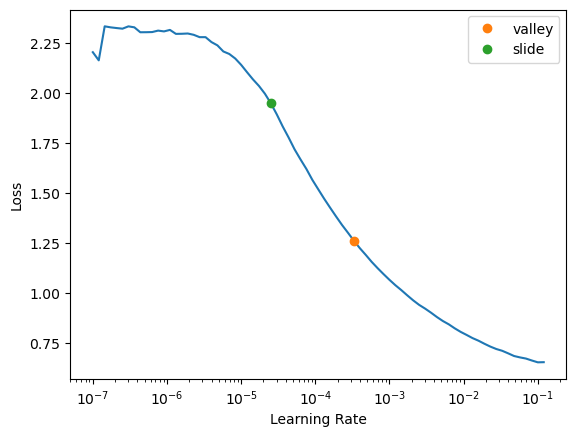

In [33]:
# Create a DataBlock for keypoint regression
dblock = DataBlock(blocks=(ImageBlock, PointBlock),
                   get_x=ColReader('name'),
                   get_y=ColReader('coordinate'),
                   splitter=RandomSplitter(),
                   item_tfms=Resize(256))

# Create a DataLoaders object
model = create_model('swinv2_base_window8_256', pretrained=True, num_classes=8)
dls = dblock.dataloaders(train_df, bs=16)
# dls.show_batch()
learn = Learner(dls, model, metrics=mae).to_fp16()
learning_rate = learn.lr_find(suggest_funcs=(valley, slide))

In [ ]:
learn.fine_tune(5, learning_rate[0])

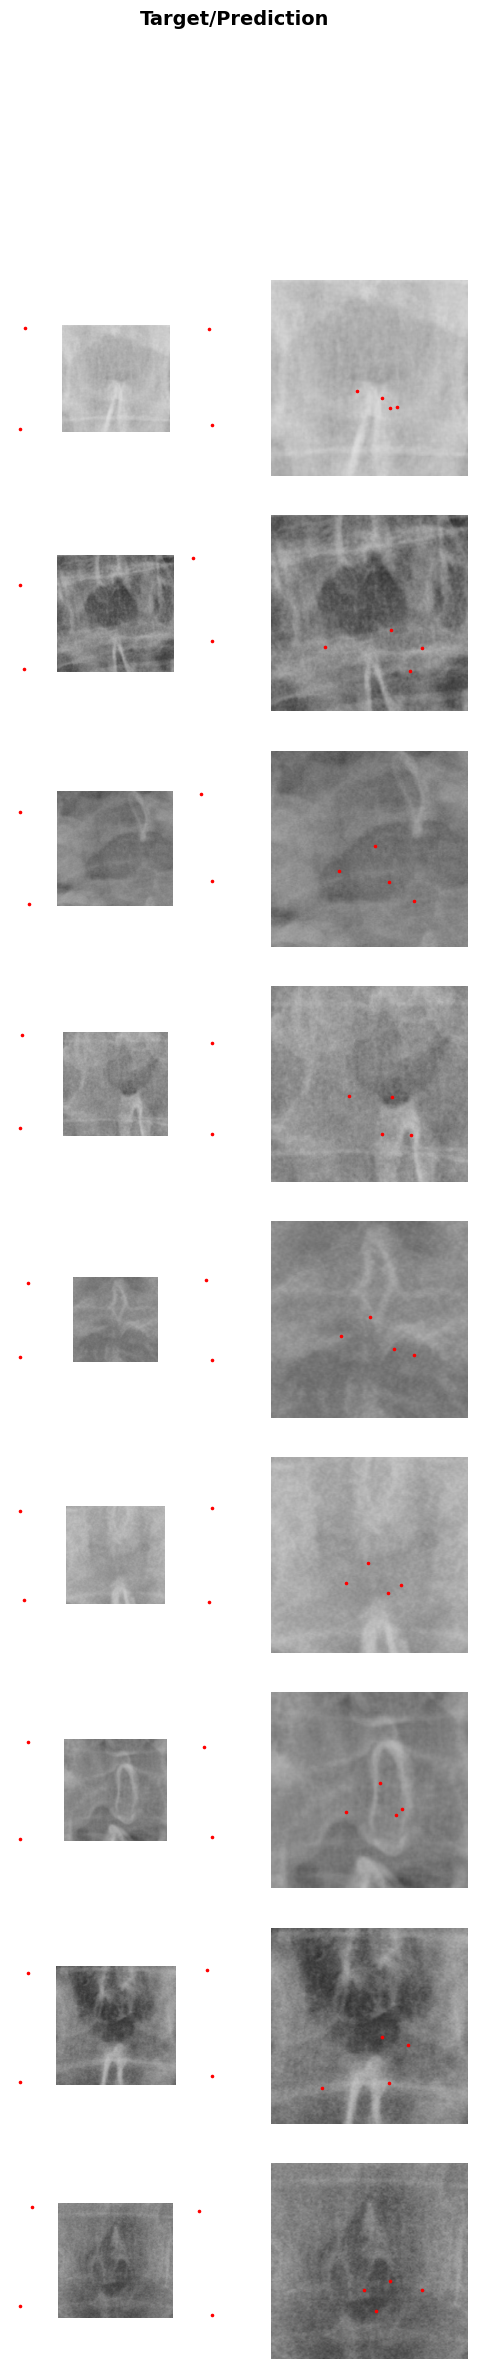

In [35]:
learn.show_results()

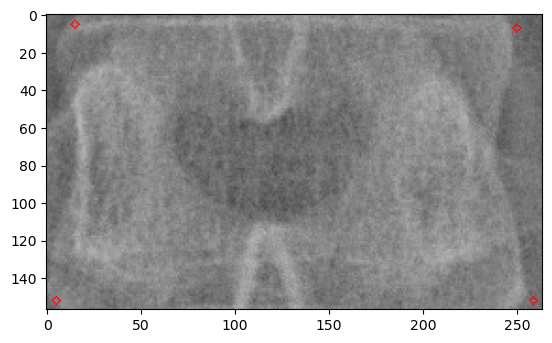

: 

In [38]:
# Plot points and bbox
image = cv2.imread('/root/hackathon/20230617_FinalLumbarSpine/crop_dataset/AP/0_0.jpg')
prep_df = pd.read_csv('/root/hackathon/20230617_FinalLumbarSpine/crop_dataset/AP/0_0.csv')
point_radius = 2
point_color = (255, 0, 0)
point_thickness = 1
bbox_color = (0, 255, 0)
bbox_thickness = 2
bbox_pad = 5
for _, (name, x1, y1, x2, y2, x3, y3, x4, y4, min_x, min_y, max_x, max_y) in prep_df.iterrows():
    for point in [(x1, y1), (x2, y2), (x3, y3), (x4, y4)]:
        cv2.circle(image, point, point_radius, point_color, point_thickness)
    cv2.rectangle(image, (min_x - bbox_pad, min_y - bbox_pad), (max_x + bbox_pad, max_y + bbox_pad),bbox_color, bbox_thickness)

plt.imshow(image)
plt.show()